<a href="https://colab.research.google.com/github/EmadSoheili/DeepLearning-UofT-NeuralNetworksCanvas/blob/main/BasicNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import our dependencies

import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
from sklearn.model_selection import train_test_split

%matplotlib inline

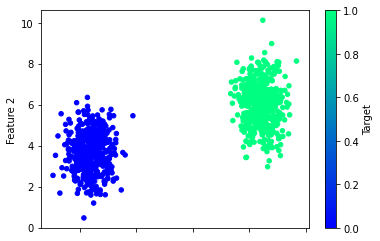

In [ ]:
# Generate dummy dataset

X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data

df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data

df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [ ]:
# Use sklearn to split dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create scaler instance

X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler

X_scaler.fit(X_train)

# Scale the data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create the Keras Sequential model

nn_model = tf.keras.models.Sequential()

In [ ]:
# Add first Dense layer, including the input layer

nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))

In [ ]:
# Add output layer

nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
nn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the Sequential model together and customize metircs

nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.6721 - accuracy: 0.5893
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6040
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.6240
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.6533
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6364 - accuracy: 0.6720
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6271 - accuracy: 0.6960
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.7173
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6065 - accuracy: 0.7413
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.7587
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5841 - accuracy: 0.7787
Epoch 11/

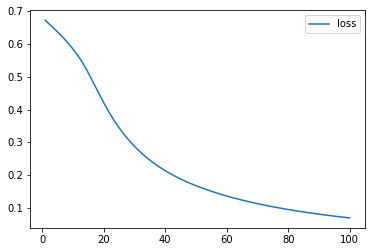

In [ ]:
# Plot the history of training

history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))
history_df.plot(y='loss')

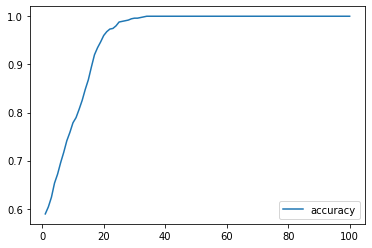

In [ ]:
history_df.plot(y="accuracy")

In [ ]:
# Evaluate the model using the test data

model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

8/8 - 0s - loss: 0.0658 - accuracy: 1.0000 - 147ms/epoch - 18ms/step
Loss: 0.06578606367111206, Accuracy: 1.0


In [ ]:
# Predict the classification of a new set of blob data

new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict(new_X_scaled)

1/1 [==============================] - 0s 55ms/step


array([[0.12221558],
       [0.9987751 ],
       [0.12221558],
       [0.99389356],
       [0.12221558],
       [0.12221558],
       [0.9974722 ],
       [0.99353755],
       [0.9914858 ],
       [0.12221558]], dtype=float32)

In [ ]:
# Split into class 0, and 1

(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 22ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)